# Image Classification of Flowers

### About the Data

* The folder of flower has 5 sub directories each with with the name corresponding to the image set of the breed of the flower that it composes.

## To Do

* Build a Convulated Neural Network and train the image set on this Neural Network so that it can correctly recognize the breed of a out of sample flower image.

## Steps

### 1. Import Libraries
### 2. Image Analysis
### 3. File Handling
### 4. Data Preprocessing
### 5. Building The CNN
### 6. Training The CNN

### Step 1
## Import Libraries

In [1]:
import os #File Handling
import numpy as np
import pandas as pd
import tensorflow as tf
import shutil
from tensorflow import keras #For Building the CNN
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator # For Data Preprocessing and Data Augmentation

C:\Users\Niraj\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Step 2
## Image Analysis

In [5]:
print(os.listdir('flowers'))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


### Daisy

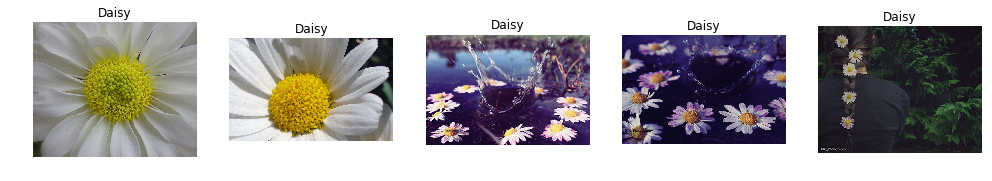

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
f, axs = plt.subplots(2,2,figsize=(17,17))
import PIL
files='flowers/daisy'
directory=os.listdir(files)
num=1
for x in directory:
    x='flowers/daisy'+'/'+x
    img = PIL.Image.open(x)
    plt.subplot(1,5,num)
    plt.title('Daisy')
    plt.axis('off')
    plt.imshow(img)
    num=num+1
    if num>5:
        break

### Dandelion

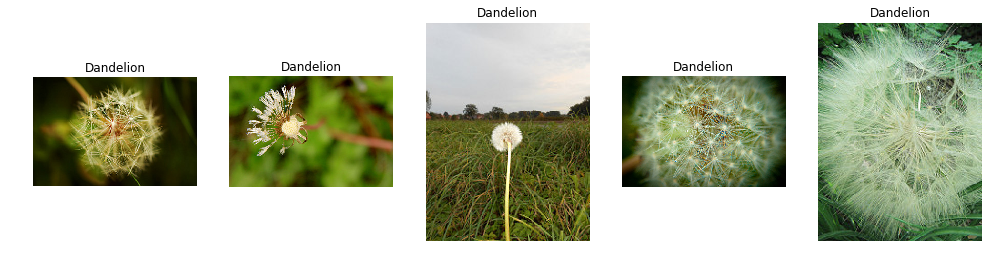

In [13]:
f, axs = plt.subplots(2,2,figsize=(17,17))
files='flowers/dandelion'
directory=os.listdir(files)
num=1
for x in directory:
    x='flowers/dandelion'+'/'+x
    img = PIL.Image.open(x)
    plt.subplot(1,5,num)
    plt.title('Dandelion')
    plt.axis('off')
    plt.imshow(img)
    num=num+1
    if num>5:
        break

### Rose

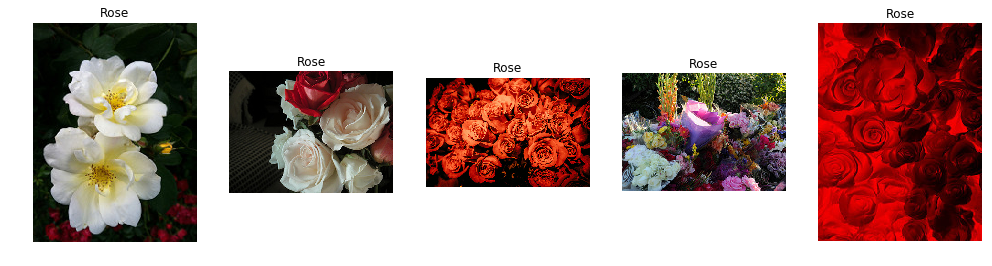

In [15]:
f, axs = plt.subplots(2,2,figsize=(17,17))
files='flowers/rose'
directory=os.listdir(files)
num=1
for x in directory:
    x='flowers/rose'+'/'+x
    img = PIL.Image.open(x)
    plt.subplot(1,5,num)
    plt.title('Rose')
    plt.axis('off')
    plt.imshow(img)
    num=num+1
    if num>5:
        break

### Sunflower

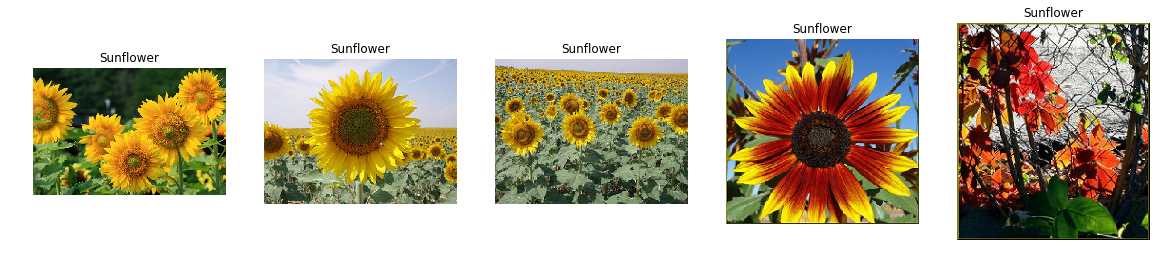

In [16]:
f, axs = plt.subplots(2,2,figsize=(20,20))
files='flowers/sunflower'
directory=os.listdir(files)
num=1
for x in directory:
    x='flowers/sunflower'+'/'+x
    img = PIL.Image.open(x)
    plt.subplot(1,5,num)
    plt.title('Sunflower')
    plt.axis('off')
    plt.imshow(img)
    num=num+1
    if num>5:
        break

### Tulip

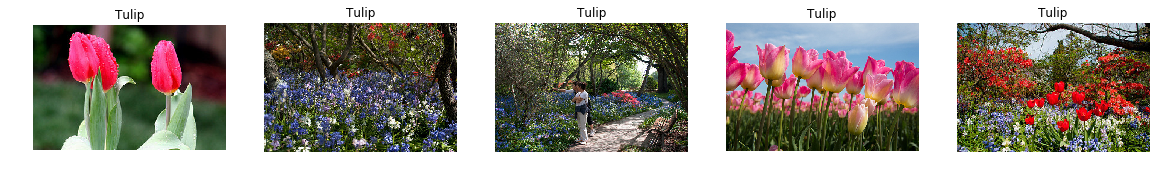

In [17]:
f, axs = plt.subplots(2,2,figsize=(20,20))
files='flowers/tulip'
directory=os.listdir(files)
num=1
for x in directory:
    x='flowers/tulip'+'/'+x
    img = PIL.Image.open(x)
    plt.subplot(1,5,num)
    plt.title('Tulip')
    plt.axis('off')
    plt.imshow(img)
    num=num+1
    if num>5:
        break

## Inference
* The image visual test set matches with the flower specie name.
* Images are of different sizes, this issue will be handled in the data preprocessing step.

### Step 3
## File Handling 

In [19]:
flowers12 = os.listdir('flowers')
print (flowers12)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [23]:
os.mkdir('flowers1') 
os.mkdir('flowers1/train')
os.mkdir('flowers1/test')
os.mkdir('flowers1/test/daisy')
os.mkdir('flowers1/test/dandelion')
os.mkdir('flowers1/test/rose')
os.mkdir('flowers1/test/sunflower')
os.mkdir('flowers1/test/tulip')

In [24]:
for f in flowers12:
    files1=os.listdir("flowers"+'/'+f)
    for g in files1:
        if np.random.rand(1)<0.20: ##approx 80%-20% train-test ratio
            shutil.move("flowers"+'/'+f+'/'+g,"flowers1"+'/'+"test"+'/'+f+'/'+g)

In [25]:
source1 = "flowers"
dest11 = "flowers1/train"
files = os.listdir(source1)
import shutil
import numpy as np
for f in files:
        shutil.move(source1 + '/'+ f, dest11 + '/'+ f)

#### Directory Tree

!["Tree"](tree1.png)

In [57]:
df2=[]
path=[]
df_1=[]
directory=os.listdir('flowers1/train')
for each in directory:
    currentFolder = 'flowers1/train' + '/'+each
    for file in os.listdir(currentFolder):
        df_1.append((each,file))


In [58]:
directory=os.listdir('flowers1/test')
for each in directory:
    currentFolder = 'flowers1/test' + '/'+each
    for file in os.listdir(currentFolder):
        df_1.append((each,file))

In [61]:
flowers_df= pd.DataFrame(df_1, columns=['Category','link'], index=None)
flowers_df.head()

,Category,link
0,daisy,100080576_f52e8ee070_n.jpg
1,daisy,10140303196_b88d3d6cec.jpg
2,daisy,10172567486_2748826a8b.jpg
3,daisy,10300722094_28fa978807_n.jpg
4,daisy,1031799732_e7f4008c03.jpg


In [65]:
flowers_df.groupby('Category').count()

,link
Category,
daisy,769
dandelion,1055
rose,784
sunflower,734
tulip,984


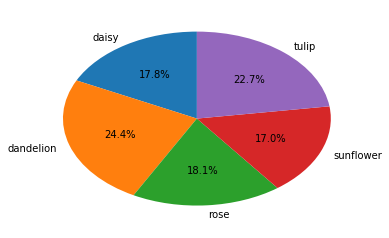

In [70]:
slices_hours = [769,1055,784,734,984]
activities =['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
plt.pie(slices_hours, labels=activities, startangle=90, autopct='%.1f%%')
plt.show()

Text(0.5,1,'Category v/s Count')

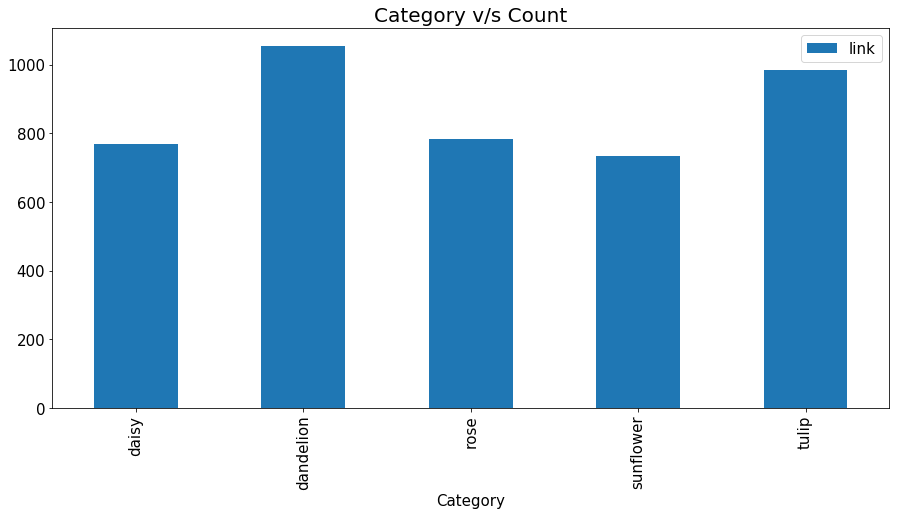

In [84]:
flowers_df.groupby('Category').count().plot(kind='bar',figsize=(15,7))
plt.rc('font', size=15)
plt.rc('axes', titlesize=20)
plt.title('Category v/s Count')

* Higher number of Dandelion and tulip images suggests that these two might have a higher prediction accuracy for the network

### Step 4
## Data Preprocessing

In [85]:
#Data Augmentation
train1 = ImageDataGenerator(rescale=1./255,horizontal_flip=True, shear_range=0.2,
                            zoom_range=0.2,width_shift_range=0.1,height_shift_range=0.1 )
test1 = ImageDataGenerator(rescale=1./255,horizontal_flip=True, shear_range=0.2,
                            zoom_range=0.2,width_shift_range=0.1,height_shift_range=0.1)

In [87]:
train_set=train1.flow_from_directory('flowers1/train',target_size = (64, 64),batch_size = 32,class_mode = 'categorical')
valid_set=test1.flow_from_directory('flowers1/test',target_size = (64, 64),batch_size = 32,class_mode = 'categorical')

Found 3468 images belonging to 5 classes.
Found 855 images belonging to 5 classes.


##### Training Set - 3468 images
##### Testing Set - 855 images

### Step 5
## Building The CNN

In [88]:
classifier = Sequential() # Initialising

In [89]:
# Layer 1
classifier.add(Convolution2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [90]:
# Layer 2
classifier.add(Convolution2D(filters=64, kernel_size=(3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Layer 3
classifier.add(Convolution2D(filters=128, kernel_size=(3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [91]:
# Flattening
classifier.add(Flatten())

In [92]:
# Full Connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 5, activation = 'softmax'))##For final classification

In [93]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
__________

## Step 6
### Compiling and Training

In [94]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

t_steps=3468/32
v_steps=855/32

In [95]:

classifier.fit_generator(train_set,steps_per_epoch = 108,
                         epochs = 50,validation_data=valid_set,validation_steps=27)

Epoch 1/50
108/108 [==============================] - 220s 2s/step - loss: 1.3954 - acc: 0.3791 - val_loss: 1.2154 - val_acc: 0.5216
Epoch 2/50
108/108 [==============================] - 78s 725ms/step - loss: 1.1190 - acc: 0.5407 - val_loss: 1.0606 - val_acc: 0.5579
Epoch 3/50
108/108 [==============================] - 78s 725ms/step - loss: 1.0099 - acc: 0.6041 - val_loss: 1.0032 - val_acc: 0.6105
Epoch 4/50
108/108 [==============================] - 78s 724ms/step - loss: 0.9373 - acc: 0.6289 - val_loss: 0.9454 - val_acc: 0.6339
Epoch 5/50
108/108 [==============================] - 86s 800ms/step - loss: 0.8791 - acc: 0.6525 - val_loss: 0.8489 - val_acc: 0.6889
Epoch 6/50
108/108 [==============================] - 79s 728ms/step - loss: 0.8473 - acc: 0.6765 - val_loss: 0.8985 - val_acc: 0.6526
Epoch 7/50
108/108 [==============================] - 79s 736ms/step - loss: 0.8179 - acc: 0.6794 - val_loss: 0.7497 - val_acc: 0.7099
Epoch 8/50
108/108 [==============================] - 79s

## Inference
* With an accuracy score of 0.9302, it is safe to say that the network did pretty well